Last updated: April 12 2024

# 👋 PyCaret Multiclass Classification Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [ ]:
# check installed version
!pip install joblib==1.3.0
!pip install pycaret==3.3.0
#!pip install pycaret --upgrade
import pycaret
pycaret.__version__

# 🚀 Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [3]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [6]:
# init setup on exp
exp.setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.8160
knn,K Neighbors Classifier,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0480
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0480
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0350
lightgbm,Light Gradient Boosting Machine,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.2600
nb,Naive Bayes,0.9445,0.0000,0.9445,0.9525,0.9438,0.9161,0.9207,0.0350
et,Extra Trees Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.1460
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.2960
dt,Decision Tree Classifier,0.9264,0.0000,0.9264,0.9502,0.9201,0.8886,0.9040,0.0350
rf,Random Forest Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.1840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0510
knn,K Neighbors Classifier,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0760
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0650
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0360
lightgbm,Light Gradient Boosting Machine,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.0930
nb,Naive Bayes,0.9445,0.0000,0.9445,0.9525,0.9438,0.9161,0.9207,0.0720
et,Extra Trees Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.1460
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.2900
dt,Decision Tree Classifier,0.9264,0.0000,0.9264,0.9502,0.9201,0.8886,0.9040,0.0660
rf,Random Forest Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.1990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

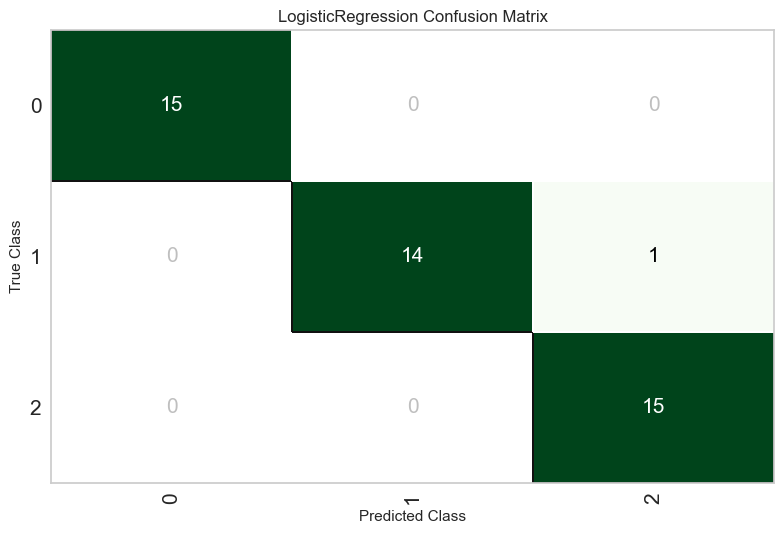

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

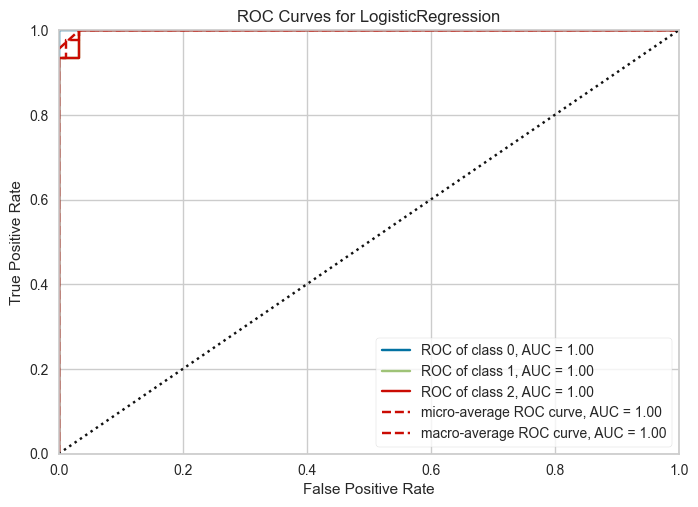

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

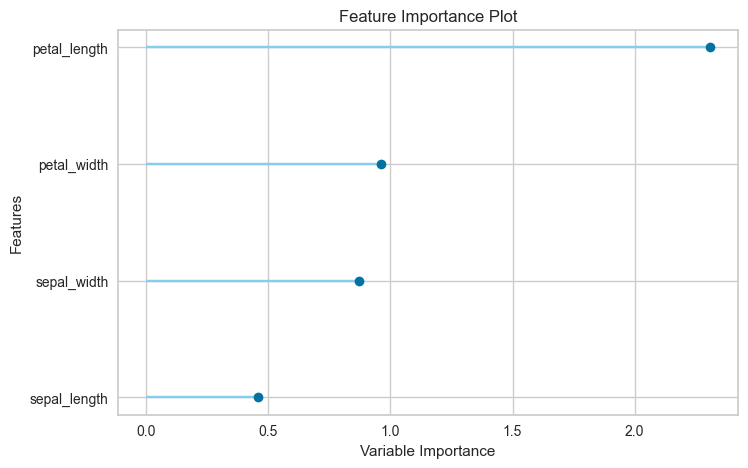

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [10]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9778,0.9985,0.9778,0.9792,0.9778,0.9667,0.9674


In [11]:
# show predictions df
holdout_pred.head()

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5203
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica,0.9503
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,0.9334
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,0.7320
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,0.9953


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [12]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('species', axis=1, inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,0.9775
1,4.9,3.0,1.4,0.2,Iris-setosa,0.9678
2,4.7,3.2,1.3,0.2,Iris-setosa,0.9820
3,4.6,3.1,1.5,0.2,Iris-setosa,0.9719
4,5.0,3.6,1.4,0.2,Iris-setosa,0.9813


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [14]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                         

In [15]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=Non...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [16]:
s = setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [17]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [18]:
# lets access X_train_transformed
get_config('X_train_transformed')

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
16,5.4,3.9,1.3,0.4
88,5.6,3.0,4.1,1.3
130,7.4,2.8,6.1,1.9
6,4.6,3.4,1.4,0.3
...,...,...,...,...
58,6.6,2.9,4.6,1.3
41,4.5,2.3,1.3,0.3
12,4.8,3.0,1.4,0.1
20,5.4,3.4,1.7,0.2


#### Random Seed
<p>A random seed is used to ensure that results are reproducible. In other words, using this parameter makes sure that anyone who re-runs your code will get the exact same outputs. Reproducibility is an extremely important concept in data science and other fields.</p>
<p>Depending on your specific project, you may not even need a random seed. However, there are 2 common tasks where they are used:</p>
<ul>
<li>
1. Splitting data into training/validation/test sets: random seeds ensure that the data is divided the same way every time the code is run.</li>

<li>2. Model training: algorithms such as random forest and gradient boosting are non-deterministic (for a given input, the output is not always the same) and so require a random seed argument for reproducible results</li>
</ul>

In [19]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [20]:
# help(setup)

In [21]:
# init setup with normalize = True

s = setup(data, target = 'species', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


<Axes: >

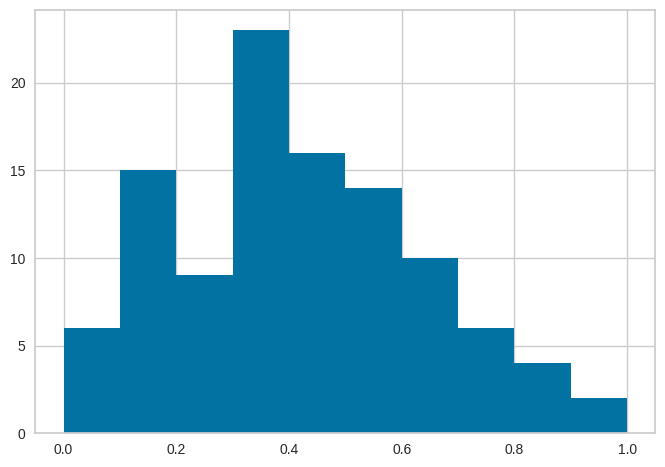

In [22]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['sepal_length'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

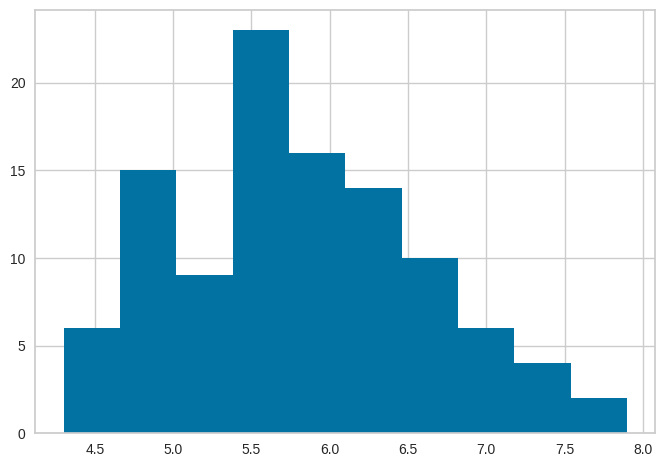

In [23]:
get_config('X_train')['sepal_length'].hist()

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.1080
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0410
knn,K Neighbors Classifier,0.9636,0.0000,0.9636,0.9709,0.9631,0.9450,0.9494,0.0510
lightgbm,Light Gradient Boosting Machine,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.3070
nb,Naive Bayes,0.9445,0.0000,0.9445,0.9525,0.9438,0.9161,0.9207,0.0450
et,Extra Trees Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.1550
dt,Decision Tree Classifier,0.9264,0.0000,0.9264,0.9502,0.9201,0.8886,0.9040,0.0460
rf,Random Forest Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.2660
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.3940
xgboost,Extreme Gradient Boosting,0.9255,0.0000,0.9255,0.9360,0.9239,0.8870,0.8937,0.0760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [25]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [27]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.1000
et,Extra Trees Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.2880
dt,Decision Tree Classifier,0.9264,0.0000,0.9264,0.9502,0.9201,0.8886,0.9040,0.0400
rf,Random Forest Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.1980
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.3050
xgboost,Extreme Gradient Boosting,0.9255,0.0000,0.9255,0.9360,0.9239,0.8870,0.8937,0.0730


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [28]:
compare_tree_models

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [29]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9536,0.0,0.9536,0.9634,0.9528,0.9298,0.9356,0.100
et,Extra Trees Classifier,0.9445,0.0,0.9445,0.9586,0.9426,0.9161,0.9246,0.288
dt,Decision Tree Classifier,0.9264,0.0,0.9264,0.9502,0.9201,0.8886,0.9040,0.040
rf,Random Forest Classifier,0.9264,0.0,0.9264,0.9343,0.9232,0.8886,0.8956,0.198
gbc,Gradient Boosting Classifier,0.9264,0.0,0.9264,0.9343,0.9232,0.8886,0.8956,0.305
xgboost,Extreme Gradient Boosting,0.9255,0.0,0.9255,0.9360,0.9239,0.8870,0.8937,0.073


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [30]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0410
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0750
knn,K Neighbors Classifier,0.9636,0.0000,0.9636,0.9709,0.9631,0.9450,0.9494,0.0890
lightgbm,Light Gradient Boosting Machine,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.2580
nb,Naive Bayes,0.9445,0.0000,0.9445,0.9525,0.9438,0.9161,0.9207,0.0400
et,Extra Trees Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.1760
dt,Decision Tree Classifier,0.9264,0.0000,0.9264,0.9502,0.9201,0.8886,0.9040,0.0430
rf,Random Forest Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.1850
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.3360
xgboost,Extreme Gradient Boosting,0.9255,0.0000,0.9255,0.9360,0.9239,0.8870,0.8937,0.0730


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [31]:
# list of top 3 models by Recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [32]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [33]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.8182,0.0000,0.8182,0.8182,0.8182,0.7250,0.7250
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.6364,0.0000,0.6364,0.6364,0.6364,0.4500,0.4500
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [35]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.0000,0.9143,0.9158,0.9140,0.8712,0.8722
1,0.8857,0.0000,0.8857,0.8922,0.8849,0.8284,0.8325
2,0.9714,0.0000,0.9714,0.9736,0.9713,0.9571,0.9582
Mean,0.9238,0.0000,0.9238,0.9272,0.9234,0.8856,0.8877
Std,0.0356,0.0000,0.0356,0.0342,0.0359,0.0535,0.0525


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.8182,0.0000,0.8182,0.8182,0.8182,0.7250,0.7250
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.7333,0.7229,0.5875,0.5950
4,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [38]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.0000,0.8182,0.8788,0.8061,0.7250,0.7642
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [40]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [41]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [42]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [46]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.6364,0.7143,0.6364,0.6364,0.6121,0.4500,0.4743
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=123,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)